# Face Recognition

In [10]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Training

In [2]:
people = ['Ben Afflek', 'Elton John', 'Jerry Seinfield', 'Madonna', 'Mindy Kaling']
DIR = r'C:\Users\chaud\OneDrive\Documents\MACHINE LEARNING\CV\OPENCV\Photos\Faces\train'

haar_cascade = cv.CascadeClassifier('misc/haar_face.xml')

In [3]:
features = []
labels = []

def create_train():
    for person in people:
        path = os.path.join(DIR, person)
        label = people.index(person)

        for img in os.listdir(path):
            img_path = os.path.join(path,img)
            img_array = cv.imread(img_path)
            if img_array is None:
                continue 
                
            gray = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)

            faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

            for (x,y,w,h) in faces_rect:
                faces_roi = gray[y:y+h, x:x+w]
                features.append(faces_roi)
                labels.append(label)
create_train()
print('Training data prepared')

Training data prepared


In [9]:
features = np.array(features, dtype='object')
labels = np.array(labels)

face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.train(features,labels)

### Testing

Label = Elton John with a confidence of 67.00856809674691


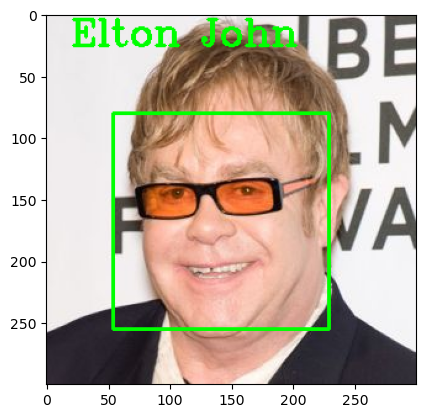

In [13]:
img = cv.imread('Photos/Faces/val/elton_john/1.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Detect the face in the image
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 4)

for (x,y,w,h) in faces_rect:
    faces_roi = gray[y:y+h,x:x+w]

    label, confidence = face_recognizer.predict(faces_roi)
    print(f'Label = {people[label]} with a confidence of {confidence}')

    cv.putText(img_rgb, str(people[label]), (20,25), cv.FONT_HERSHEY_COMPLEX, 1.0, (0,255,0), thickness=2)
    cv.rectangle(img_rgb, (x,y), (x+w,y+h), (0,255,0), thickness=2)

plt.imshow(img_rgb)
plt.show()